Sources:
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://github.com/pritishuplavikar/Face-Recognition-on-Yale-Face-Dataset/blob/master/pca_knn_yale.ipynb
https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
https://lvdmaaten.github.io/tsne/
http://vision.ucsd.edu/content/yale-face-database

In [24]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import glob

In [25]:
def build_dataset():
    org_dataset = []
    dataset_labels = []
    for i in range(1, 16):
        filelist = glob.glob('data/yalefaces/subject'+str(i).zfill(2)+"*")
        for fname in filelist:
            img = np.array(Image.open(fname))
            img = img.reshape(img.shape[0]*img.shape[1])
            org_dataset.append(img)
            dataset_labels.append(i)

    org_dataset = np.array(org_dataset)

    return org_dataset, dataset_labels

dataset, labels = build_dataset()

In [26]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(dataset)

[Text(0.5, 1.0, 'PCA visualisation results of Yalefaces dataset')]

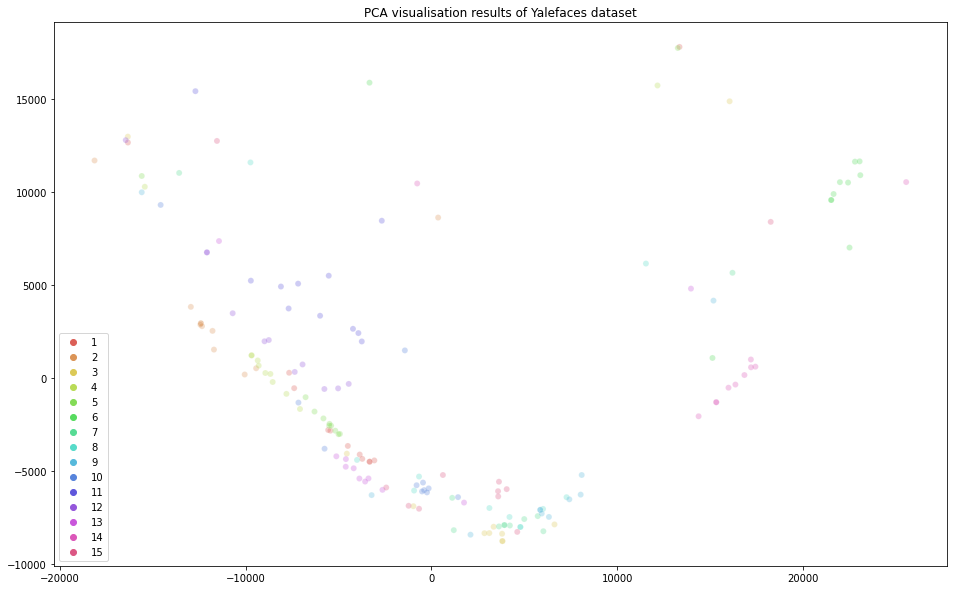

In [27]:
x = pca_results[:,0]
y = pca_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x, y=y,
    hue=labels,
    palette=sns.color_palette("hls", 15),
    legend="full",
    alpha=0.3
).set(title='PCA visualisation results of Yalefaces dataset')

In [38]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=500)
tsne_results = tsne.fit_transform(dataset)

/Users/an/miniforge3/envs/try2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/an/miniforge3/envs/try2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'PCA visualisation results of Yalefaces dataset')]

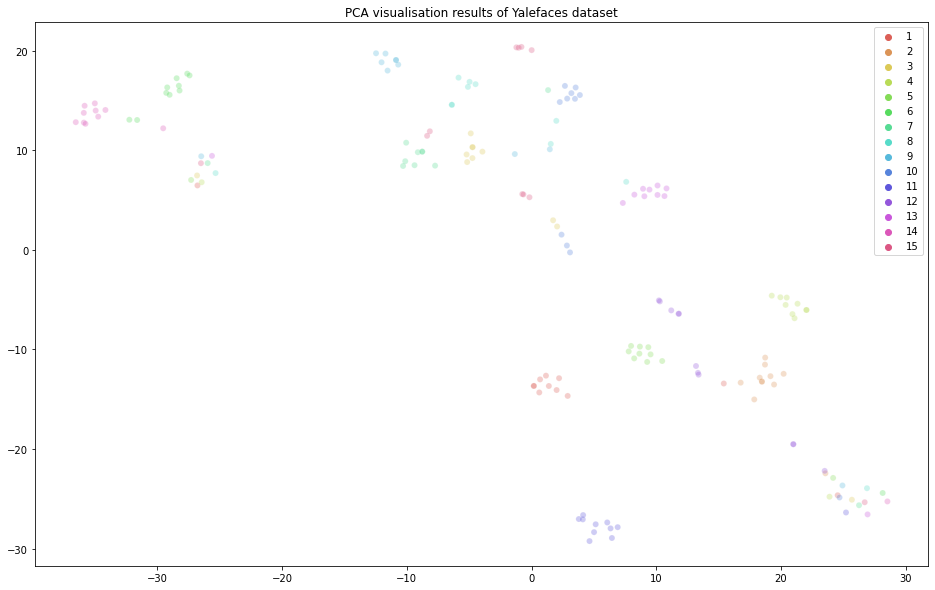

In [39]:
x = tsne_results[:,0]
y = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x, y=y,
    hue=labels,
    palette=sns.color_palette("hls", 15),
    legend="full",
    alpha=0.3
).set(title='PCA visualisation results of Yalefaces dataset')